In [1]:
import requests
import torch
from transformers import BlipForConditionalGeneration, BlipProcessor
from diffusers import DDIMScheduler, DDIMInverseScheduler, StableDiffusionImg2ImgPipeline,UNet2DConditionModel
import pickle
from transformers import AutoProcessor, LlavaForConditionalGeneration
from PIL import Image
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import psnr,psnr_transform
from pytorch_msssim import ms_ssim

model_ckpt = "CompVis/stable-diffusion-v1-4"
pipeline = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_ckpt, torch_dtype=torch.float32, use_safetensors=True
)
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)
# pipeline = pipeline.to("cuda")


/data/maryam.sana/anaconda3/envs/compressai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|████████████████████████████| 7/7 [00:00<00:00,  8.43it/s]


In [2]:
model_path = "/data/maryam.sana/diffusers/examples/text_to_image/sd_mod"
unet = UNet2DConditionModel.from_pretrained(
    model_path, subfolder="unet",torch_dtype=torch.float32)
# ).to('cuda')

pipeline.unet = unet

In [3]:
prompt = "horse on grassy field with jockey"
img_path = 'data/custom_data/train/img00002.png'
image = Image.open(img_path)
img = image.resize((512,512))
pred =pipeline(prompt, image=image, width = 512, height =512 ).images
gen[0]

100%|██████████████████████████████████████████████████████████| 40/40 [42:42<00:00, 64.07s/it]


NameError: name 'gen' is not defined

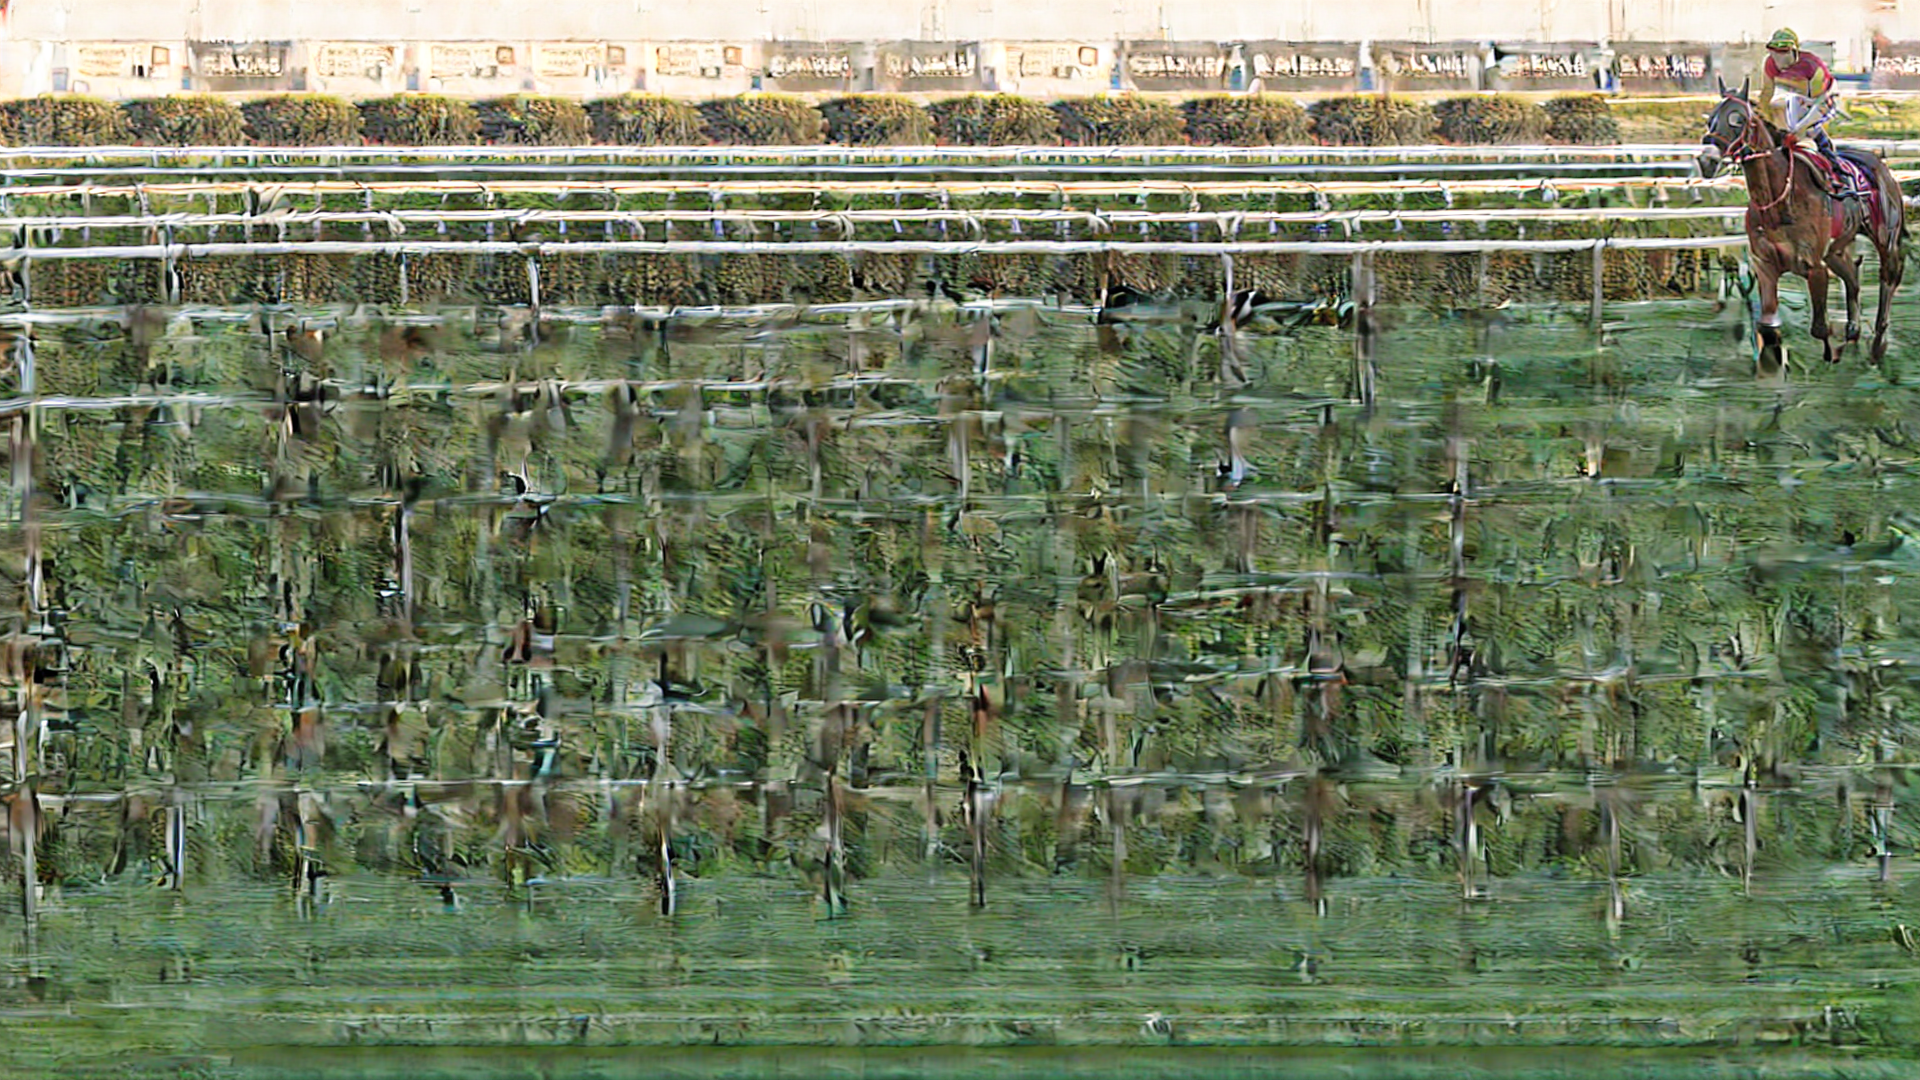

In [4]:
pred[0]

In [5]:
orig_image= psnr_transform(image)
pred_wl = psnr_transform(pred[0]).to('cpu').squeeze(0)

print('psnr: ',psnr(orig_image, pred_wl,255).item())
print('mssim:', ms_ssim(orig_image.unsqueeze(0), pred_wl.unsqueeze(0),255).item())

psnr:  14.23507308959961
mssim: 0.20851314067840576
